#Dataset Related Visualizations

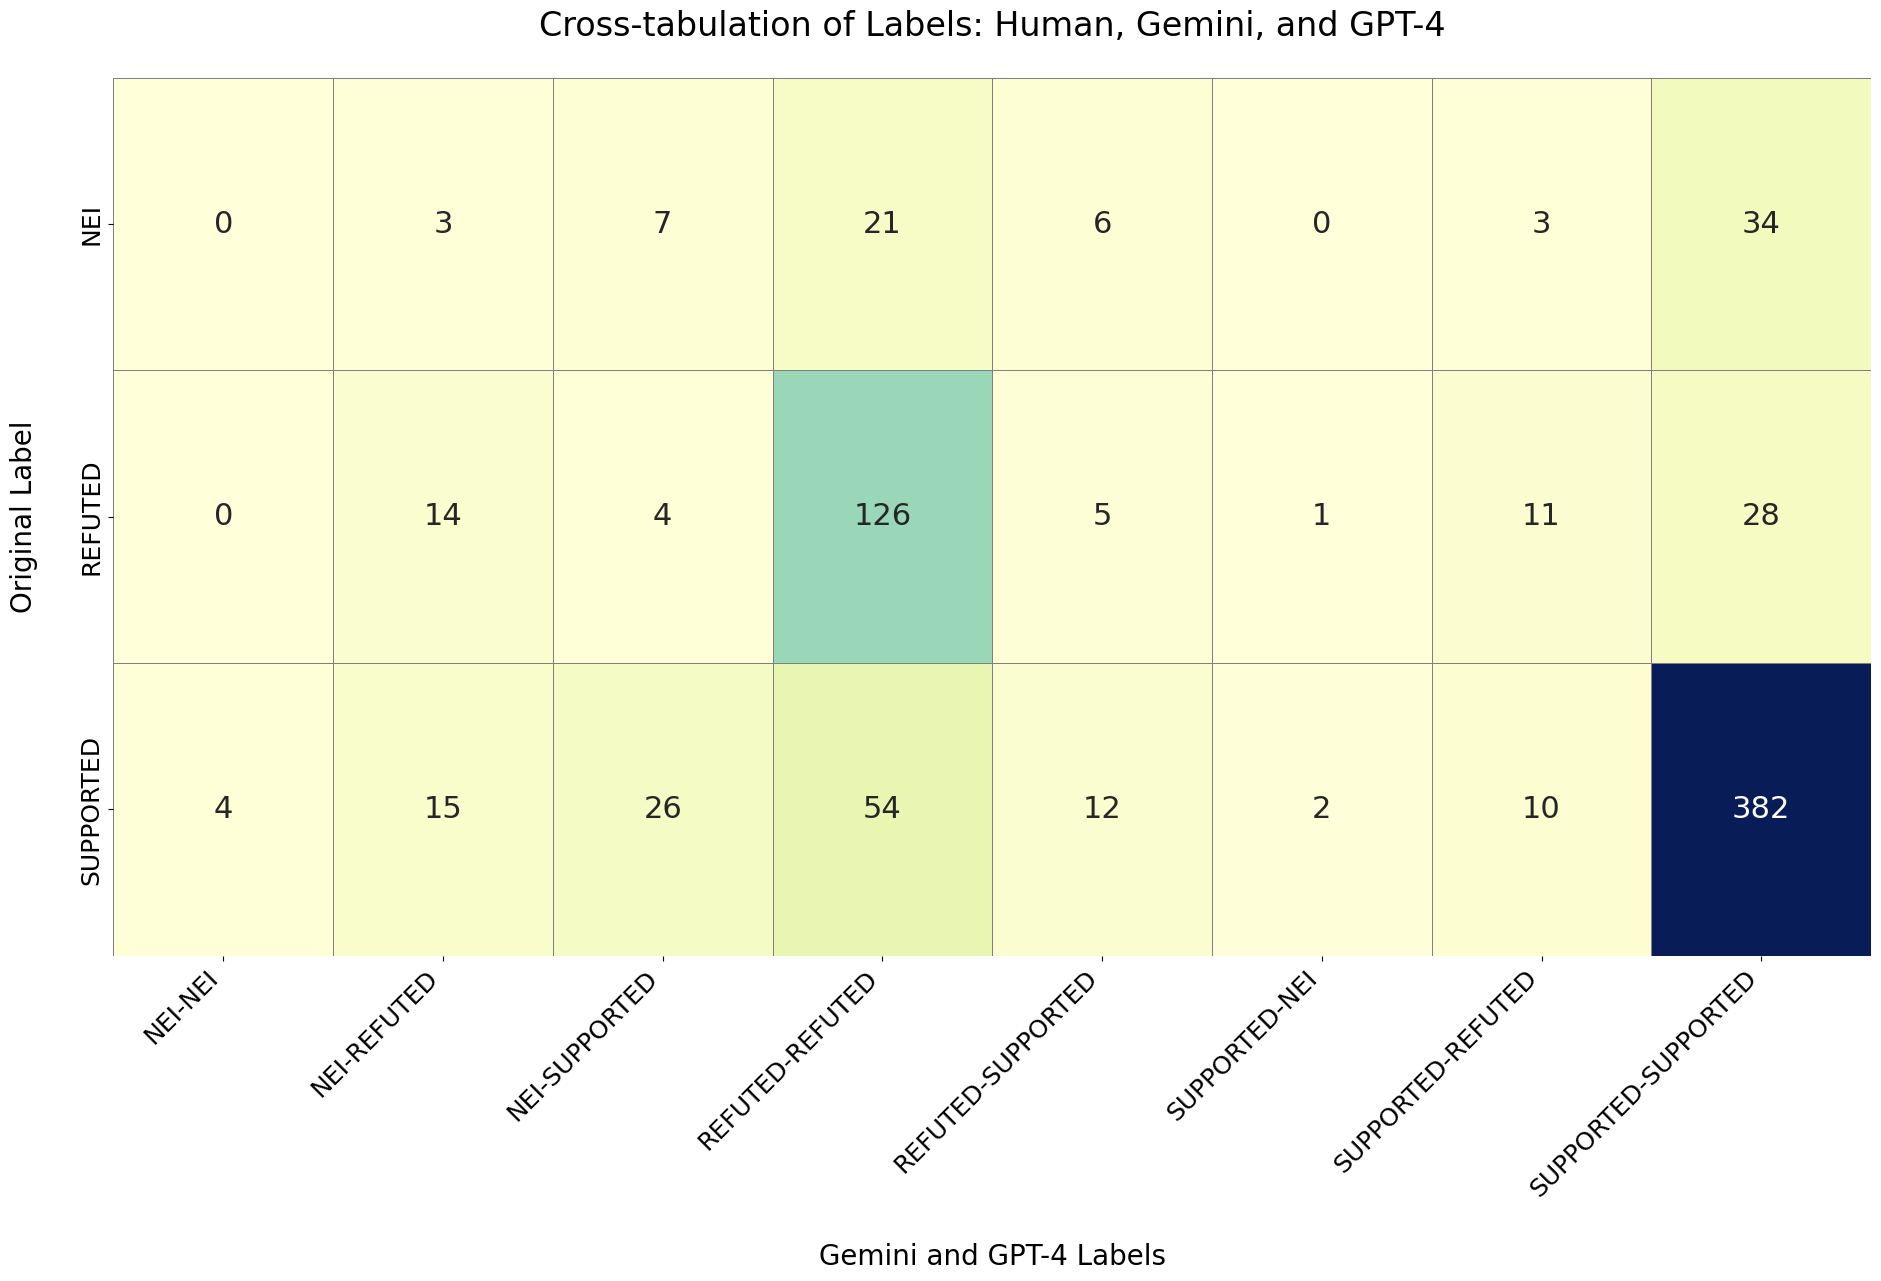

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'datasethumanattribution.xlsx'
data = pd.read_excel(file_path)

data['label'] = data['label'].replace('NOT ENOUGH INFORMATION', 'NEI')
data['gemini_label'] = data['gemini_label'].replace('NOT ENOUGH INFORMATION', 'NEI')
data['gpt4_label'] = data['gpt4_label'].replace('NOT ENOUGH INFORMATION', 'NEI')

cross_tab_nei = pd.crosstab([data['label']], [data['gemini_label'], data['gpt4_label']])

plt.figure(figsize=(20, 14))
sns.heatmap(cross_tab_nei, annot=True, fmt="d", cmap="YlGnBu", cbar=False, linewidths=0.5, linecolor='gray',
            annot_kws={"size": 22})
plt.title("Cross-tabulation of Labels: Human, Gemini, and GPT-4", fontsize=24, pad=30)
plt.ylabel("Original Label", fontsize=20, labelpad=30)
plt.xlabel("Gemini and GPT-4 Labels", fontsize=20, labelpad=30)
plt.xticks(rotation=45, ha="right", fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout(pad=5.0)

pdf_path = 'label_cross_tab_heatmap_final.pdf'
plt.savefig(pdf_path, format='pdf')


# Human Attributions

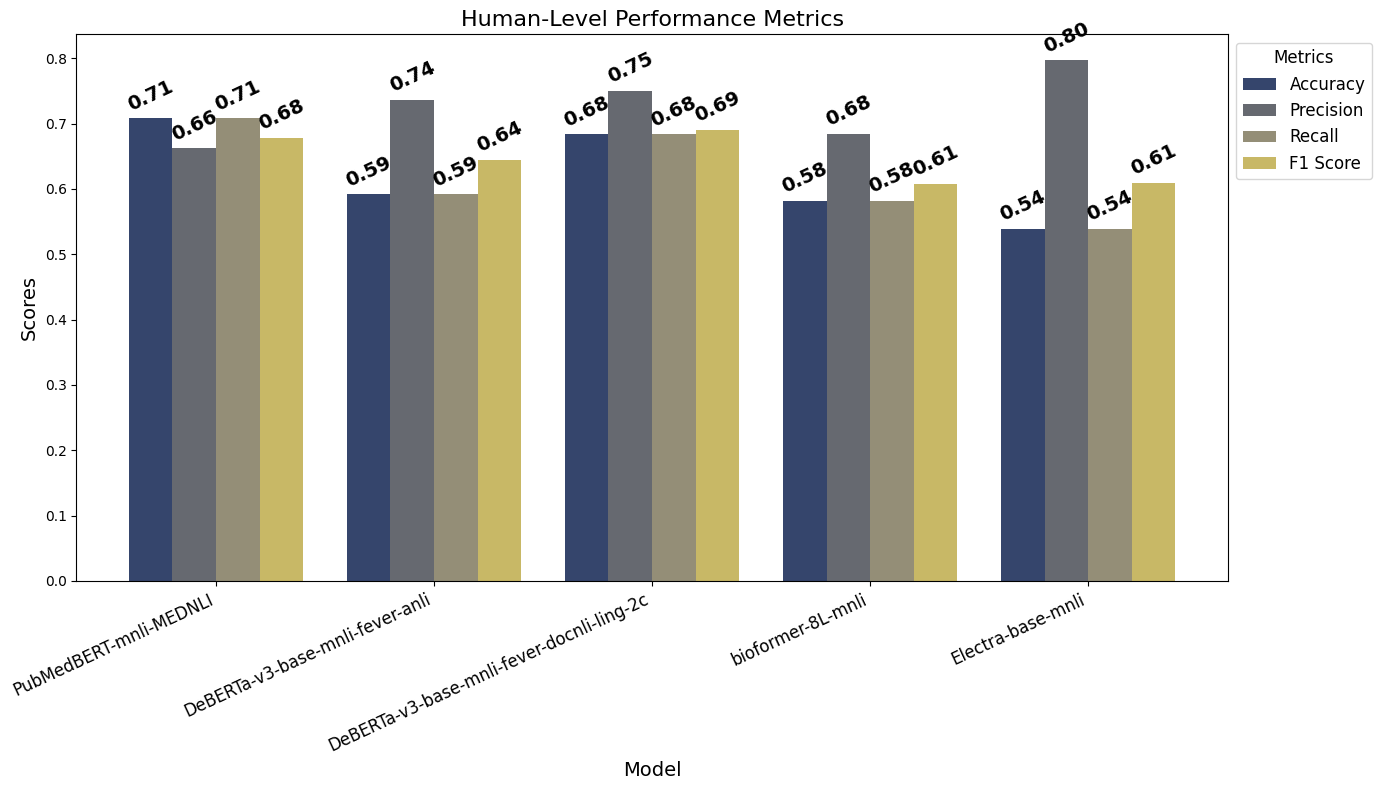

'HumanLevelAttribution_Evaluation.pdf'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = {
    'Model': [
        'PubMedBERT-mnli-MEDNLI',
        'DeBERTa-v3-base-mnli-fever-anli',
        'DeBERTa-v3-base-mnli-fever-docnli-ling-2c',
        'bioformer-8L-mnli',
        'Electra-base-mnli'
    ],
    'Accuracy': [
        0.7080, 0.5917, 0.6835, 0.5814, 0.5388
    ],
    'Precision': [
        0.6621, 0.7361, 0.7498, 0.6848, 0.7969
    ],
    'Recall': [
        0.7080, 0.5917, 0.6835, 0.5814, 0.5388
    ],
    'F1 Score': [
        0.6783, 0.6446, 0.6905, 0.6081, 0.6098
    ]
}

df_human = pd.DataFrame(data)

ind = np.arange(len(df_human))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))

bars1 = ax.bar(ind - width*1.5, df_human['Accuracy'], width, label='Accuracy', color=plt.cm.cividis(0.2))
bars2 = ax.bar(ind - width/2, df_human['Precision'], width, label='Precision', color=plt.cm.cividis(0.4))
bars3 = ax.bar(ind + width/2, df_human['Recall'], width, label='Recall', color=plt.cm.cividis(0.6))
bars4 = ax.bar(ind + width*1.5, df_human['F1 Score'], width, label='F1 Score', color=plt.cm.cividis(0.8))

ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Human-Level Performance Metrics', fontsize=16)
ax.set_xticks(ind)
ax.set_xticklabels(df_human['Model'], rotation=25, ha='right', fontsize=12)
ax.legend(title='Metrics', fontsize=12, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

ax.bar_label(bars1, fmt='%.2f', padding=3, fontsize=14, fontweight='bold', rotation=25)
ax.bar_label(bars2, fmt='%.2f', padding=3, fontsize=14, fontweight='bold', rotation=25)
ax.bar_label(bars3, fmt='%.2f', padding=3, fontsize=14, fontweight='bold', rotation=25)
ax.bar_label(bars4, fmt='%.2f', padding=3, fontsize=14, fontweight='bold', rotation=25)

plt.tight_layout()

output_path = "HumanLevelAttribution_Evaluation.pdf"
plt.savefig(output_path)
plt.show()

output_path


# Classification Ratios Visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_metrics(df):
    correct_counts = df[df['Actual Label'] == df['Predicted Label']].groupby('Category').size()
    misclass_counts = df[df['Actual Label'] != df['Predicted Label']].groupby('Category').size()

    total_counts = df.groupby('Category').size()

    correct_ratios = correct_counts / total_counts
    misclassification_ratios = misclass_counts / total_counts

    return correct_counts, misclass_counts, correct_ratios, misclassification_ratios

def create_pdf_with_proposition_level_text(pdf_file, model_name, metrics):
    correct_counts, misclass_counts, correct_ratios, misclassification_ratios = metrics

    correct_counts = correct_counts.reindex(correct_ratios.index, fill_value=0)
    misclass_counts = misclass_counts.reindex(misclassification_ratios.index, fill_value=0)

    plt.figure(figsize=(15, 10))

    bars_correct = plt.barh(correct_ratios.index, correct_ratios, color='green', alpha=0.6, label='Correct Classification Ratio')
    bars_incorrect = plt.barh(correct_ratios.index, misclassification_ratios, color='red', alpha=0.6, label='Misclassification Ratio', left=correct_ratios)

    plt.title(f'{model_name} Proposition-level Retrieval', fontsize=20)
    plt.xlabel('Ratio', fontsize=18)
    plt.ylabel('Category', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    for bar, correct_count, misclass_count in zip(bars_correct, correct_counts, misclass_counts):
        width = bar.get_width()
        if width > 0:
            plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{int(correct_count)} ({round(width, 2)})', ha='left', va='center', fontsize=14)

    for bar, misclass_count in zip(bars_incorrect, misclass_counts):
        width = bar.get_width()
        if width > 0:
            left_width = bar.get_x()
            plt.text(left_width + width + 0.01, bar.get_y() + bar.get_height()/2, f'{int(misclass_count)} ({round(width, 2)})', ha='left', va='center', fontsize=14)

    plt.tight_layout()
    plt.savefig(pdf_file)
    plt.close()


file_path = '1.2.1_results.csv'
df = pd.read_csv(file_path)

metrics = calculate_metrics(df)

model_name = "DeBERTa_v3_mnli_anli_fever_Proposition Level"
pdf_output_path = 'deberta_prop.pdf'

create_pdf_with_proposition_level_text(pdf_output_path, model_name, metrics)
